# SHAP Analysis for Image Classification
This notebook demonstrates how SHAP (SHapley Additive exPlanations) can be used to understand decisions made by a random forest classifier processing image features.

## Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from scipy.ndimage import gaussian_filter, gaussian_laplace
import shap

## Create sample image and features

In [2]:
# Create synthetic image with two circles
image = np.zeros((100, 100))
y, x = np.ogrid[-50:50, -50:50]
mask1 = x*x + y*y <= 400
mask2 = x*x + y*y <= 100
image[mask1] = 1
image[mask2] = 0
plt.imsave('original_image.png', image, cmap='gray')

## Generate feature images using Gaussian and Laplacian filters

In [3]:
features = []
sigmas = [1, 2, 4]

for sigma in sigmas:
    gaussian = gaussian_filter(image, sigma)
    laplacian = gaussian_laplace(image, sigma)
    features.extend([gaussian, laplacian])
    
    plt.imsave(f'gaussian_sigma{sigma}.png', gaussian.astype(np.uint8), cmap='gray')
    plt.imsave(f'laplacian_sigma{sigma}.png', laplacian.astype(np.uint8), cmap='gray')

## Prepare data for classifier

In [4]:
X = np.array([f.flatten() for f in features]).T
y = image.flatten()
feature_names = [f'gaussian_sigma{s}' for s in sigmas] + [f'laplacian_sigma{s}' for s in sigmas]

## Train Random Forest Classifier

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

## SHAP Analysis

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1000x600 with 0 Axes>

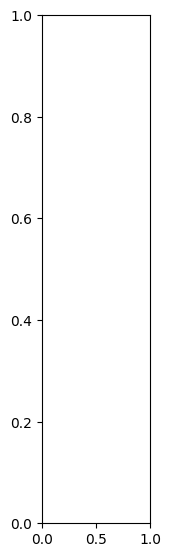

In [6]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
plt.tight_layout()
plt.savefig('shap_summary.png')
plt.close()

## Visualize feature importance

In [ ]:
feature_importance = np.abs(shap_values).mean(0)
plt.figure(figsize=(10, 4))
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()